In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Для анализа возьмем бета-распределение. Для него задается два параметра: альфа (обозначим a) и бета (b). 
Согласно материалам из википедии, дисперсия и математическое ожидание бета-распределения рассчитываются по формулам:
    
$$ DX = \frac {(\alpha*\beta)}{(\alpha+\beta)^2 *(\alpha+\beta+1)} $$ 

$$ EX = \frac{\alpha}{(\alpha+\beta)} $$
    

In [2]:
a=2 # задаем параметр альфа
b =5 # задаем параметр бета

# стандартное отклонение бета-распределения (используутся для апроксимации выборочных средних нормальными распределениями):
D = ((a*b)/((a+b+1)*(a+b)**2))**0.5 

# математическое ожидание бета-распределения (используутся для апроксимации выборочных средних нормальными распределениями):
E =a/(a+b) 


## Построение графика и гистограммы плотности вероятности бета-распределения

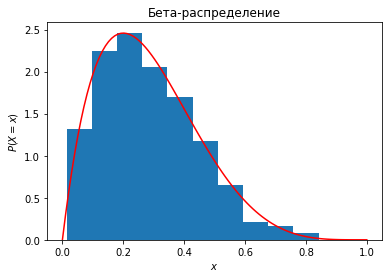

In [3]:
beta1 = sts.beta(a,b)
beta_rv = beta1.rvs(size=1000)

plt.hist(beta_rv, normed=True) # строим гистограмму
x = np.linspace(0, 1, 100) # задаем вектор для построения графика 
plt.plot(x, beta1.pdf(x), color = 'red') # строим функцию плотности вероятности
plt.xlabel('$x$')
plt.title('Бета-распределение')
plt.ylabel('$P(X=x)$')
plt.show('$F(X=x)$')

## Создаем 1000 выборок объемом n = 5, строим гистограммы выборочных средних и аппроксимируем гистограмму нормальным распределением

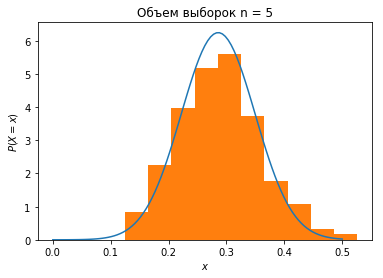

In [4]:
beta_mean = []
for i in range(0, 1000, 1):
    beta_rv = beta1.rvs(size=5)
    beta_mean.append(np.mean(beta_rv)) 
norm_rv = sts.norm(loc=E, scale=D/2.5) # дисперсию разделил на 2.5 - так гистограмма лучше описывается нормальным распределением
x = np.linspace(0,0.5,100)  # задаем диапазон для построения графика нормального распределения
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='нормальное распр-ие')
plt.hist(beta_mean, normed = True, label='распр-ие выборки')
plt.title('Объем выборок n = 5')
plt.xlabel('$x$')
plt.ylabel('$P(X=x)$')
plt.show()

## Создаем 1000 выборок объемом n = 10

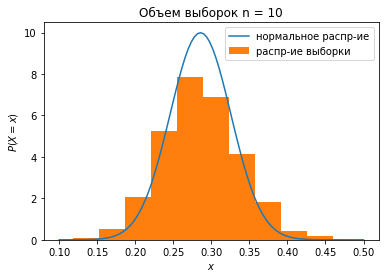

In [5]:
beta_mean = []
for i in range(0, 1000, 1):
    beta_rv = beta1.rvs(size=10)
    beta_mean.append(np.mean(beta_rv))
norm_rv = sts.norm(loc=E, scale=D/4) # дисперсию разделил на 4 - так гистограмма лучше описывается нормальным распределением
x = np.linspace(0.1,0.5,100)  # задаем диапазон для построения графика нормального распределения
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='нормальное распр-ие')
plt.hist(beta_mean, normed = True, label='распр-ие выборки')
plt.xlabel('$x$')
plt.ylabel('$P(X=x)$')
plt.title('Объем выборок n = 10')
plt.legend(loc = 1)
plt.show()

## Создаем 1000 выборок объемом n = 50

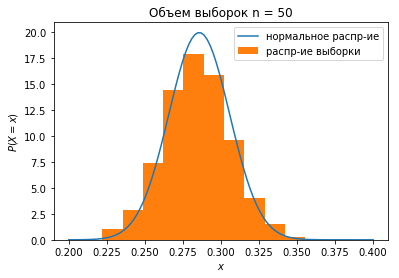

In [6]:
beta_mean = []
for i in range(0, 1000, 1):
    beta_rv = beta1.rvs(size=50)
    beta_mean.append(np.mean(beta_rv)) 
norm_rv = sts.norm(loc=E, scale=D/8)  # # дисперсию разделил на 8 - так гистограмма лучше описывается нормальным распределением
x = np.linspace(0.2,0.4,100)  # задаем диапазон для построения графика нормального распределения
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='нормальное распр-ие')
plt.hist(beta_mean, normed = True, label='распр-ие выборки')
plt.xlabel('$x$')
plt.ylabel('$P(X=x)$')
plt.title('Объем выборок n = 50')
plt.legend(loc = 1)
plt.show()

Выводы:
    1. Математическое ожидание и дисперсия бета-распределения не зависят от объема выборки.
    2. При увеличении объема исследуемых выборок распределения их выборочных средних становятся более симметричными и лучше описываются нормальным распределением.
    3. Для подгона графика нормального распределения к гистограммам выборочных средних дисперсия бета-распределения
    делилась на число меньшее объема соответствующих выборок, что позволило лучше подогнать график нормального распределения. 
    